## Regression

    Regression analysis is a predictive modelling technique which investigates the relationship between a dependent and independent variable. In simple terms the regression can be defined as:
    
    “Using the relationship between variables to find the best fit line or the regression equation that can be used to make predictions”

## Linear Regression

    Linear regression is the simplest and most widely used statistical technique for predictive modeling. It basically gives us an equation, where we have our features as independent variables, on which our target variable is dependent upon.
    
    Let us take a simple example to understand the concept of regression. Consider the following data –
   
| (X-axis)| (Y-axis) | 
|:--: |:--:|
|1 |4|
| 3|5|
| 4|3|
| 2|2|
| 5|5|

    If we plot the above data, we get the following:
   ![alt text](graph1.png "Title")
      
    In Linear Regression, we try to find the best-fitting straight line through the points. The best-fitting line is called a regression line.
   ![alt text](graph2.png "Title")
   
    In the above plot, the black line is the regression line. The most frequently used criterion for the best fitting line is the line which minimizes the sum of the squared errors of prediction. The error of prediction for a point is the value of the point minus the predicted value. The predicted value is simply the value on the regression line.

    For example, for the point where x=3, y=5, the predicted value is 3.4, that is, the point on the line corresponding to x=3 is 3.4 but actually the y value is 5. So, the error of prediction is 1.6.

    The regression line minimizes the root mean square error, that is, the root of sum of square of errors of prediction of all the points. The mean square error (MSE) is the mean of square of the errors of prediction of all the points. And the root mean square error (RMSE) is the root of MSE. In the above example, the MSE is 2.150 and RMSE is 1.466.
    
    
    
    So our goal is to find the line that can best represents our data. (That gives minimum RMSE)
   ![alt text](graphgif.gif "Title")
   

## Sklearn Implementation:

    So for implementing the linear regression we are using the Boston Housing dataset. The data set can be easily loaded from sklearn's library. It contains information about various houses in Boston through different parameters. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. 

### Importing Libraries
    Lets start by importing libraries that we will use.

In [1]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

In [2]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

### Importing dataset

In [11]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

## Lets visualize our data
(bos.head())

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [4]:
print("[INFO] dataset summary")
print(boston.DESCR)

[INFO] dataset summary
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,00

### Data preprocessing

    After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using .isnull()

In [5]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Exploratory Data Analysis:

    Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.
    Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

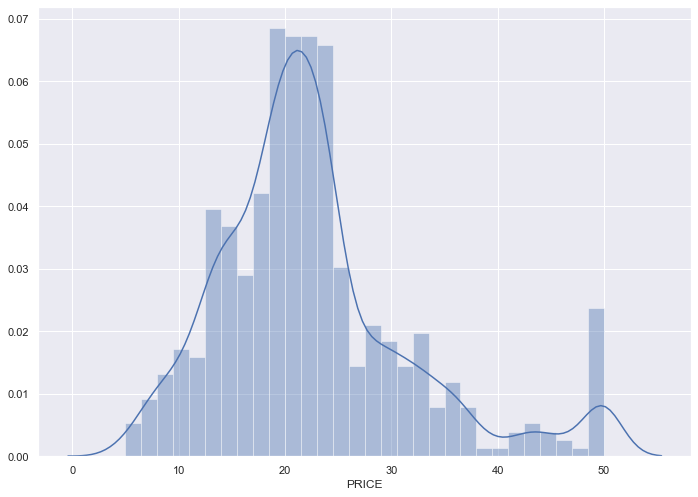

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['PRICE'], bins=30)
plt.show()

    We see that the values of MEDV are distributed normally with few outliers.
    Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

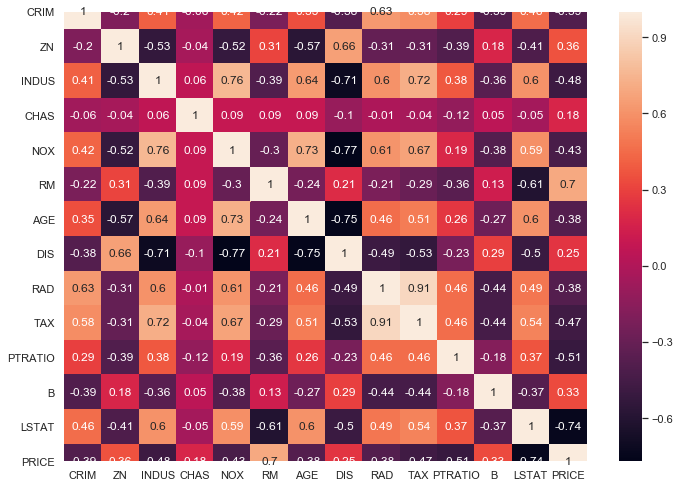

In [7]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

    The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

    Observations:
    To fit a linear regression model, we select those features which have a high correlation with our target variable PRICE. By looking at the correlation matrix we can see that RM has a strong positive correlation with PRICE (0.7) where as LSTAT has a high negative correlation with PRICE (-0.74).
    

### Preparing the data for training the model
    So we will be only using one column as our independent feature

In [12]:
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


### Splitting the data into training and testing sets

    Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


### Training and testing the model
    We use scikit-learn’s LinearRegression to train our model on both the training and test sets.


### Testing metrics
    For testing performance of our algorithms we are using two metrics.
    1)Mean Squared error:
        MSE measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. 
   ![alt text](MSE.png "Title")
   
       You might be asking yourself, what is this graph?

    * The purple dots are the points on the graph. Each point has an x-coordinate and a y-coordinate.
    * The blue line is our prediction line. This is a line that passes through all the points and fits them in the best way. This line contains the predicted points.
    * The red line between each purple point and the prediction line are the errors. Each error is the distance from the point to its predicted point.

    You should remember this equation from your school days, y=Mx+B, where M is the slope of the line and B is y-intercept of the line.

    We want to find M (slope) and B (y-intercept) that minimizes the squared error!

    2) R2 score:
        R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.R-squared = Explained variation / Total variation

    R-squared is always between 0 and 100%:

    0% indicates that the model explains none of the variability of the response data around its mean.
    100% indicates that the model explains all the variability of the response data around its mean.
    In general, the higher the R-squared, the better the model fits your data.
    
    Plotting fitted values by observed values graphically illustrates different R-squared values for regression models.
   ![alt text](R2.png "Title")
   
    
    The regression model on the left accounts for 38.0% of the variance while the one on the right accounts for 87.4%. The more variance that is accounted for by the regression model the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.
        

In [14]:
X_train.shape

(404, 1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = round(lin_model.score(X_train, Y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [13]:
# model evaluation for test set

y_pred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
r2 = round(lin_model.score(X_test, Y_test),2)

print("The model performance for test set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




### Visualizing Results

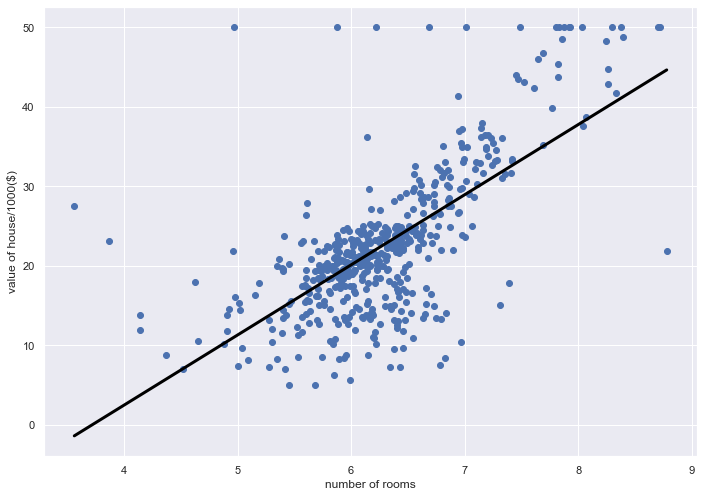

In [15]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, lin_model.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

## Overfitting

    In our previous notebook (Week 1- Regression) we have seen that a straight line  fits pretty well, but not good enough. And we need a more suitable approach. We need to find some method that can help us to generate a line more closer to actual points. So let’s think about an improvement. But how can we do that?

 

| (X-axis)| (Y-axis) | 
|:--: |:--:|
|1 |7|
|2 |8|
|3 |7|
|4 |13|
|5 |16|
|6 |15|
|7 |19|
|8 |23|
|9 |18|
|10|21|

### Importing libraries

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import c_
import matplotlib.pyplot as plt

### Loading Data

In [31]:
X = np.arange(1, 11).reshape(10, 1)
y = np.array([7, 8, 7, 13, 16, 15, 19, 23, 18, 21]).reshape(10, 1)

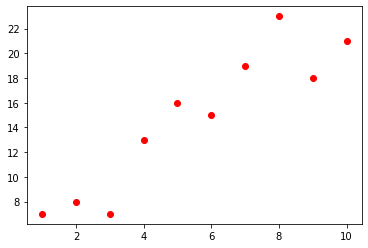

In [32]:
plt.plot(X, y, 'ro')
plt.show()

### Using Linear Regression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

    Our training data is quite simple, so the learning process finished so fast as if it never happened. All the change during training (like weights and bias), was stored in the model object. Let’s see what we got:

    Since equation of a line is a=wx+b
    Where w= weight
          b= bias
          x= Features

In [35]:
w=model.coef_
print("w = ",model.coef_)
b=model.intercept_
print("b= ",model.intercept_)


w =  [[1.77575758]]
b=  [4.93333333]


    Next, let’s compute the prediction vector a, using the obtained weight and bias:

In [36]:
a = w * X + b

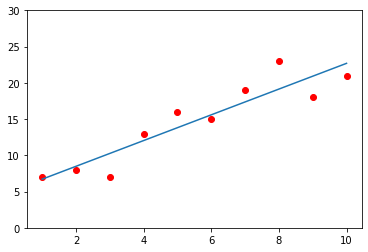

In [37]:
plt.plot(X, y, 'ro', X, a)
axes = plt.gca()
axes.set_ylim([0, 30])
plt.show()

## Improving the performance of Linear Regression

    Obviously, we can see that the straight line above fits pretty well, but not good enough. And we need a more suitable approach. But first, let’s evaluate how well the Model is performing numerically, by computing the accuracy over the training data:

 

In [38]:
print(model.score(X, y))

0.849880708423668


    Our Model now has the accuracy of 85% over the training data. Commonly, we demand a higher accuracy, let’s say 90% or 95%. So by looking at the current accuracy, we can tell that our Model is not performing as we are expecting. So let’s think about an improvement. But how can we do that?

    Features are something we use to distinguish one object from others. So obviously, if we have more Features, then we will likely have a better fit model, since it can receive more necessary information for training. But how we can acquire more Features?
    
    Polynomial Features
    The easiest way to add more Features, is to computing polynomial features from the provided features. It means that if we have X, then we can use X2, X3, etc as additional features. So let’s use this approach and see if we can improve the current Model. First, we have to modify our X matrix by adding X2:



In [40]:
X = c_[X, X**2]
X

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

    Similar to previous step, let’s train our new Model, then compute the prediction vector a:

 

In [44]:
model.fit(X, y)
x = np.arange(1, 11)
x = c_[x, x**2]
a = np.dot(X, model.coef_.transpose()) + model.intercept_

In [45]:
x

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

    Mathematically, we will now have a=θ0+θ1X+θ2X2. Note that now we have more complicated matrix X, so we will have to use the dot function. An error will occur if we just use the multiply operator like above. I also created a new x variable, which ranges from 1 to 10, but with 0.1 step. Use the new x to compute a will result in a smoother graph of a, since a is no longer a straight line anymore.

    Now let’s plot things out and see what we got with new feature matrix:

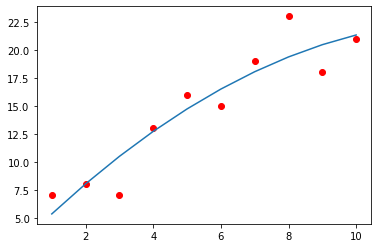

In [46]:
plt.plot(X[:, 0], y, 'ro', x[:, 0], a)
plt.show()

    As you can see, now we obtain a curved line, which seems to fit our training data much better. To be more concrete, let’s use the score function:

 

In [47]:
model.score(X, y)

0.8721550691495155

    Now we got a new accuracy of 87%, which is a huge improvement right? At this point, you may think that we can improve it a lot more by continuing to add more polynomial features to it. Well, don’t guess. Let’s just do it. This time we will add up to degree 9.

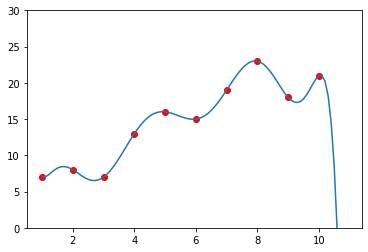

In [48]:
X = np.arange(1, 11)
X = c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9]
x = np.arange(1, 11, 0.1)
x = c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]

model.fit(X, y)
a = np.dot(x, model.coef_.transpose()) + model.intercept_

plt.plot(X[:, 0], y, 'ro', x[:, 0], a)
axes = plt.gca()
axes.set_ylim([0, 30])
plt.show()

    Now we just obtained a new curve which fit our training data perfectly. Let’s use the score function again to get an exact number:

In [49]:
model.score(X, y)

0.9999999999769595

    Wow, let’s see what we have here, an accuracy of 100%. This is real magic, you may think. But that is just where the tragic begins…

    Now let imagine our data has total 15 examples, and I just showed you the first 10. I will reveal the last 5 examples like below:
    
| (X-axis)| (Y-axis) | 
|:--: |:--:|
|11 |24|
|12 |23|
|13 |22|
|14 |26|
|15 |22|

    So actually our data will look like this:

 

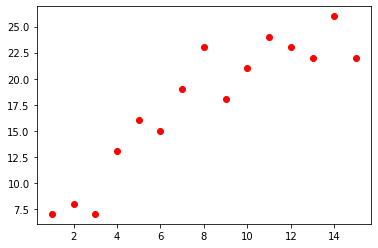

In [50]:
X = np.arange(1, 16)
y = np.append(y, [24, 23, 22, 26, 22])

plt.plot(X, y, 'ro')
plt.show()

    Let’s see what happens if we use the Model obtained from degree 9 polynomial features:

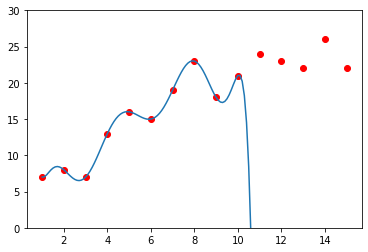

In [51]:
plt.plot(X, y, 'ro', x[:, 0], a)
axes = plt.gca()
axes.set_ylim([0, 30])
plt.show()


    What a tragic! It doesn’t seem to fit the new data at all! We don’t even feel the need of computing the accuracy on the new data.

    As I told you before, in the first post, that we only provided a fixed set of training data, and the Model will have to deal with new data which it has never seen before. New data, which may vary in unpredictable way in real life, penalized our trained Model this time! In Machine Learning term, we call it OVERFITTING problem (or High Variance). Overfitting, as the name is self-explained itself, means that the Model fits the data very well when we prodived a set of data containing a lot of features. We can see that the Model tends to memorize the data, rather than to learn from it, which makes it unable to predict the new data.

### Prevention of overfitting :

    Overfitting is something that we try to avoid. And we mostly face these problems all the time we work with Machine Learning. Of course, there are many ways to deal with them, but I will leave all the details for a future post. This time I will tell you the simplest way, which can be seen as a “must-do” in the very first step of any Machine Learning problem.

#### Splitting dataset for training and testing

    The first thing to do to prevent the problems above, is always splitting the dataset into training data and testing data. Never just count on the accuracy on training data! Why? Because even though we obtained a high accuracy, it does not mean that our Model is doing a good job. Conversely, we need to watch out for Overfitting problem. By splitting our dataset into two seperate parts, we will use one part for training, and the other for evaluating the trained Model. Because we evaluate the performance on a separate data, we can know if our Model can work well with new data that it has never seen. And we can somehow tell whether our Model has Overfitting problem or not.

## Need of regularization:

    In supervised machine learning, models are trained on a subset of data aka training data. The goal is to compute the target of each training example from the training data.
    Now, overfitting happens when model learns signal as well as noise in the training data and wouldn’t perform well on new data on which model wasn’t trained on. In the example below, you can see underfitting in first few steps and overfitting in last few.


   ![alt text](greg.gif "Title")
   

    Now, there are few ways you can avoid overfitting your model on training data like cross-validation sampling, reducing number of features, pruning, regularization etc.
    Regularization basically adds the penalty as model complexity increases. Regularization parameter (lambda) penalizes all the parameters except intercept so that model generalizes the data and won’t overfit.

### Implementation of linear regression:
    First we will implement a simple linear regression that uses a good amount of features for predicting target variable, then we will apply regularization techniques to see its effects

#### Importing libraries

In [20]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

#### Importing data set

In [4]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

## Lets visualize our data
(bos.head())

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [20]:
#create our X and y
X = bos.drop('PRICE', axis=1)
y = bos['PRICE']


#### Splitting data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(404, 1)
(102, 1)


#### Training model 
    Let’s establish a baseline by training a linear regression model.


In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.7434997532004697
Test score: 0.7112260057484903
RMSE: 4.6386899261728445


    The model above should give us a training accuracy and a test accuracy of about 72%. We should also get an RMSE of about 4.587. The next models we train should outperform this model with higher accuracy scores and a lower RMSE.
    We need to engineer new features. Specifically, we need to create polynomial features by taking our individual features and raising them to a chosen power. Thankfully, scikit-learn has an implementation for this and we don’t need to do it manually.
    Something else we would like to do is standardize our data. This scales our data down to a range between 0 and 1. This serves the purpose of letting us work with reasonable numbers when we raise to a power.
    Finally, because we need to carry out the same operations on our training, validation, and test sets, we will introduce a pipeline. This will let us pipe our process so the same steps get carried out repeatedly.
    To summarize, we will scale our data, then create polynomial features, and then train a linear regression model.


In [23]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 0.9464085556651521
Test score: 0.6801589253686641


    After running our code, we will get a training accuracy of about 94.75%, and a test accuracy of 68%. This is a sign of overfitting. It’s normally not a desirable feature, but that is exactly what we were hoping for.
    We will now apply regularization to our new data.

## Types of Regularization

    In order to create less complex (parsimonious) model when you have a large number of features in your dataset, some of the Regularization techniques used to address over-fitting and feature selection are:
    
    1. L2 Regularization
        
    2. L1 Regularization
    
    The key difference between these two is the penalty term.
    

### L2 regularization:

    A regression model which uses L2 is called Ridge Regression. Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.
    Here, if lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.
   ![alt text](L2.png "Title")
   

    To understand Ridge Regression, we need to remind ourselves of what happens during gradient descent, when our model coefficients are trained. During training, our initial weights are updated according to a gradient update rule using a learning rate and a gradient. Ridge regression adds a penalty to the update, and as a result shrinks the size of our weights. This is implemented in scikit-learn as a class called Ridge.
    We will create a new pipeline, this time using Ridge. We will specify our regularization strength by passing in a parameter, alpha. This can be really small, like 0.1, or as large as you would want it to be. The larger the value of alpha, the less variance your model will exhibit.

In [24]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score: 0.932206333486421
Test Score: 0.8038169683868271


    By executing the code, we should have a training accuracy of about 91.8%, and a test accuracy of about 82.87%. That is an improvement on our baseline linear regression model.

### L1 regularization:

    A regression model that uses L1 regularization technique is called Lasso Regression. Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function. Again, if lambda is zero then we will get back OLS whereas very large value will make coefficients zero hence it will under-fit.
   ![alt text](L1.png "Title")
   

    By creating a polynomial model, we created additional features. The question we need to ask ourselves is which of our features are relevant to our model, and which are not.
    l1 regularization tries to answer this question by driving the values of certain coefficients down to 0. This eliminates the least important features in our model. We will create a pipeline similar to the one above, but using Lasso. You can play around with the value of alpha, which can range from 0.1 to 1.

In [28]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

Training score: 0.9009935544114708
Test score: 0.8040767285167993


    The code above should give us a training accuracy of 90%, and a test accuracy of 80%

## Exercises
    To learn any thing in a more better way requires experimenting that thing by yourself. Since we have implemented linear regression uptil now with default parameters. But what if I change the parameters. Are they going to affect the results ?
    
    1) Arguments used in sklearn Linear regression function are : 
        LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
        Try changing these and see the effect
    
    2) I have standardized the data by putting StandardScaler() function in a pipeline, what if I dont standardize the data?See its effects.
    
    3) Change the degree of PolynomialFeatures(degree=2) and see how it varies the test and the training accuracy.
    
    4) For ridge regularization change the amount of regularization and see the effect on test and train score.
    
    5) For Lasso regularization change the amount of regularization and see the effect on test and train score.
    